In [27]:
!pip install opencv-python

In [28]:
import cv2

In [1]:
!pip install ibm_watson

  Using cached https://files.pythonhosted.org/packages/8a/a1/72ef9aa26cfe1a75cee09fc1957e4723add9de098c15719416a1ee89386b/websocket_client-0.48.0-py2.py3-none-any.whl


In [2]:
import json
from ibm_watson import VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import FileWithMetadata, AnalyzeEnums
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [3]:
apikey = '2Nqhk8v4JGQHlWGS1RU8oct63S13Lv4j3ZynpyAsZpoo'
url = 'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/3361568d-a5ff-4259-afa7-11d18cc811b9'
collection = 'bcd89c69-f3f9-4618-9dc0-cff4c1f7956a'

In [4]:
authenticator = IAMAuthenticator(apikey)
service = VisualRecognitionV4('2018-03-19', authenticator=authenticator)
service.set_service_url(url)

In [54]:
path = r"C:\Users\vaishnavi\Desktop\Project\SignLanguageDetector\Images\iloveyou\iloveyou.7f8dc95d-9788-11eb-97f7-544249f36e18.jpg"

In [55]:
with open(path, 'rb') as iloveyou_img:
    analyze_images = service.analyze(collection_ids=[collection], 
                                     features=[AnalyzeEnums.Features.OBJECTS.value], 
                                    images_file=[FileWithMetadata(iloveyou_img)]).get_result()

In [56]:
analyze_images

{'images': [{'source': {'type': 'file',
    'filename': 'iloveyou.7f8dc95d-9788-11eb-97f7-544249f36e18.jpg'},
   'dimensions': {'height': 480, 'width': 640},
   'objects': {'collections': [{'collection_id': 'bcd89c69-f3f9-4618-9dc0-cff4c1f7956a',
      'objects': [{'object': 'ILoveYou',
        'location': {'left': 158, 'top': 196, 'width': 200, 'height': 215},
        'score': 0.9660672}]}]}}]}

In [57]:
obj = analyze_images['images'][0]['objects']['collections'][0]['objects'][0]['object']
coords = analyze_images['images'][0]['objects']['collections'][0]['objects'][0]['location']

In [58]:
obj

'ILoveYou'

In [59]:
coords

{'left': 158, 'top': 196, 'width': 200, 'height': 215}

In [60]:
from matplotlib import pyplot as plt

In [61]:
img = cv2.imread(path)

In [62]:
img

array([[[ 40,  36,  17],
        [ 37,  36,  16],
        [ 40,  37,  22],
        ...,
        [127, 124,  73],
        [125, 122,  71],
        [124, 122,  68]],

       [[ 41,  40,  20],
        [ 43,  42,  22],
        [ 38,  38,  20],
        ...,
        [127, 124,  73],
        [125, 123,  69],
        [124, 122,  68]],

       [[ 37,  40,  18],
        [ 40,  42,  22],
        [ 38,  40,  20],
        ...,
        [130, 126,  73],
        [128, 124,  71],
        [126, 123,  68]],

       ...,

       [[117, 109,  62],
        [117, 109,  62],
        [117, 108,  65],
        ...,
        [129, 138,  82],
        [130, 135,  80],
        [130, 136,  79]],

       [[116, 111,  62],
        [114, 109,  60],
        [116, 108,  61],
        ...,
        [130, 136,  83],
        [131, 135,  83],
        [132, 135,  80]],

       [[114, 110,  59],
        [112, 108,  57],
        [112, 104,  57],
        ...,
        [128, 134,  81],
        [133, 135,  83],
        [131, 133,  81]]

In [63]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

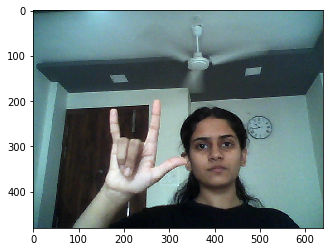

In [64]:
plt.imshow(img)

In [65]:
img = cv2.rectangle(img, (coords['left'], coords['top']), (coords['left']+coords['width'], coords['top']+coords['height']), (0,255,0), 10) 

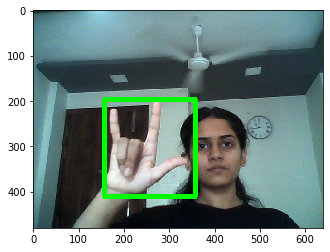

In [66]:
plt.imshow(img)

In [67]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, text=obj, org=(coords['left']+coords['width'], coords['top']+coords['height']), fontFace=font, fontScale=2, color=(0,255,0), thickness=5, lineType=cv2.LINE_AA)

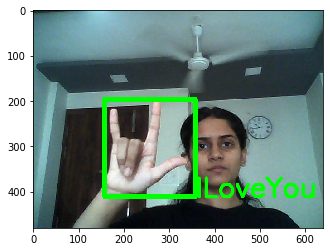

In [68]:
plt.imshow(img)

In [69]:
obj

'ILoveYou'